# Understanding Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
import time

In [4]:
%%time
train_iden = pd.read_csv('ieee-fraud-detection/train_identity.csv')
train_tran = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
test_iden = pd.read_csv('ieee-fraud-detection/test_identity.csv')
test_tran = pd.read_csv('ieee-fraud-detection/test_transaction.csv')

Wall time: 41.5 s


#### Adversarial IEEE : https://www.kaggle.com/tunguz/adversarial-ieee

- 해당 kernel에서는 train data를 1, test data를 0 으로 target 변수를 만든다.
- train set, test set를 concat해서 모델로 예측한 뒤에 (즉, train인지 test인지)
- feature importance를 확인한다

-> 이에 대한 의미?  
- train, test를 잘 분리할 수 있다는 것은 즉, 해당 feature의 분포가 train, test에서 다르다는 의미!
- train, test를 잘 분리할 수 있는 column을 찾았다는 의미!
- 활용방안은 그 때 마다 다른듯!

#### Day and Time - powerful predictive feature? : https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature

- TransactionDT는 초단위
- 이 값을 60x60x24 으로 나누면 하루 마다 transaction의 얼마나 일어났는지 셀 수 있다.
- 아래 그림을 통해 시간별 주기성이 있다는 것을 파악할 수 있었다.

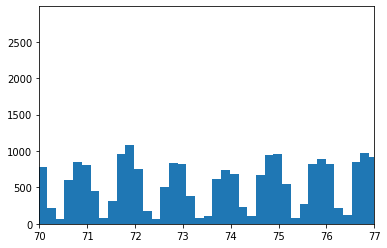

In [23]:
x = train_tran["TransactionDT"] / (60*60*24)
plt.hist(x, bins = 1000)
plt.xlim(70,77)
plt.show()

요일별로 fraud가 일어난 평균 횟수 check
- 아래 그림을 통해 보면 별 차이가 없는 듯 하다.
- 요일 feature는 모델링에서 별 영향이 없을 듯 하다.

In [24]:
def make_day_feature(df, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6. 
    """
    days = df[tname] / (60*60*24)        
    encoded_days = np.floor(days) % 7
    return encoded_days

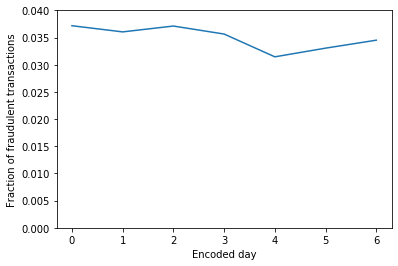

In [28]:
train_tran['weekday'] = make_day_feature(train_tran)
x = train_tran.groupby('weekday')['isFraud'].mean()
plt.plot(x)
plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')
plt.show()

이번에는 시간대별로 확인해보자!
- 시간대별로는 영향을 줄 수도 있지 않을까 생각이 든다.

In [29]:
def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    """
    hours = df[tname] / (60*60)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

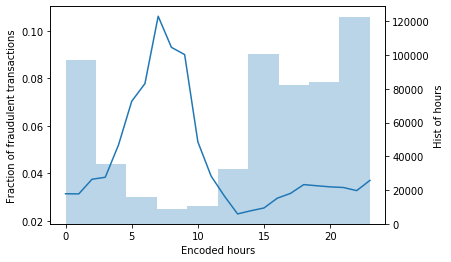

In [40]:
train_tran['hours'] = make_hour_feature(train_tran)
x = train_tran.groupby('hours')['isFraud'].mean()

fig, ax1 = plt.subplots()
ax1.plot(x)
ax1.set_xlabel('Encoded hours')
ax1.set_ylabel('Fraction of fraudulent transactions')

ax2 = ax1.twinx()
ax2.hist(train_tran['hours'], alpha=0.3)
ax2.set_ylabel('Hist of hours')

plt.show()